In [22]:
import numpy as np

Evaluation on the best CNN on the test set

In [23]:
%store -r X_train
%store -r y_train
%store -r X_val
%store -r y_val

#these are all stored from the notebook cnn_gridsearch.ipynb, to make sure that training and parameter tuning are implemented on the exact same data

In [24]:
%store -r X_test

#stored from the notebook test_preprocessing_part2.ipynb

In [25]:
%store -r y_test

#stored from the notebook test_preprocessing_part2.ipynb

In [26]:
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [27]:
y_test=y_test.to_numpy()
y_test=np.array(y_test.tolist())

In [28]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [29]:
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(1, 219)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))

# Output layer with 6 units for classification
model.add(Dense(4, activation='softmax'))

# Create an optimizer with an initial learning rate
optimizer = Adam(learning_rate=0.0001)

# Use ReduceLROnPlateau callback to adjust learning rate during training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_2          │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_4 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_5 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 513,540 (1.96 MB)

 Trainable params: 513,540 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2842 - loss: 1.3861 - val_accuracy: 0.2563 - val_loss: 1.3812
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2656 - loss: 1.3815 - val_accuracy: 0.3267 - val_loss: 1.3667
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3616 - loss: 1.3650 - val_accuracy: 0.4458 - val_loss: 1.3382
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4353 - loss: 1.3518 - val_accuracy: 0.4350 - val_loss: 1.3245
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4529 - loss: 1.3303 - val_accuracy: 0.4025 - val_loss: 1.3369
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4536 - loss: 1.3406 - val_accuracy: 0.3935 - val_loss: 1.3315
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4576 - loss: 1.3454 - val_accuracy: 0.4224 - val_loss: 1.3281
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4580 - loss: 1.3336 - val_accuracy: 0.4278 - v

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1991 - loss: 1.6617
Test Loss: 2.0566
Test Accuracy: 0.2316


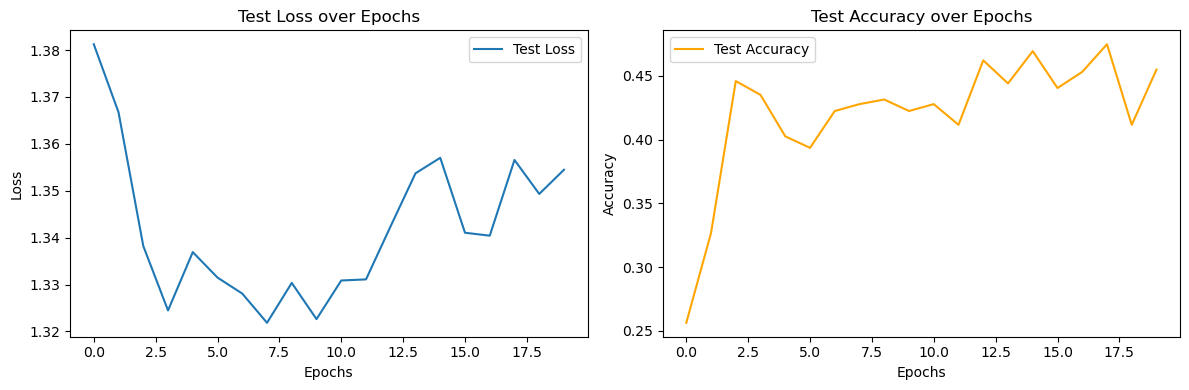

In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=1)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot the test loss and test accuracy over epochs
plt.figure(figsize=(12, 4))

# Plot test loss
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Test Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


